In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [70]:
# Read in the dataset for Total Loans to non-bank customers by type
df = pd.read_csv("../data/TotalLoanstoNonBankCustomersbyType.csv")

In [71]:
# Data Preprocessing
df["datetime"] = pd.to_datetime(df['month'])

# Check the earliest year and latest year
print(df.sort_values(by = 'datetime').head())
print(df.sort_values(by = "datetime", ascending = False).head())

      month   level_1                                            level_2  \
0   2004-03  Business                  Agriculture, Mining and Quarrying   
13  2004-03  Consumer      Professional and Private Individuals - Others   
12  2004-03  Consumer  Professional and Private Individuals - Share F...   
11  2004-03  Consumer  Professional and Private Individuals - Credit ...   
9   2004-03  Consumer                         Housing and Bridging Loans   

    total_loans   datetime  
0        2484.6 2004-03-01  
13      27203.4 2004-03-01  
12        419.5 2004-03-01  
11       3253.3 2004-03-01  
9       55419.4 2004-03-01  
        month   level_1                                        level_2  \
1931  2015-08  Consumer  Professional and Private Individuals - Others   
1924  2015-08  Business                         Financial Institutions   
1918  2015-08  Business              Agriculture, Mining and Quarrying   
1919  2015-08  Business                                  Manufacturing   

Earliest year is 2004, latest year is 2015.

In [72]:
# Distinct categories
np.unique(df['level_1'])

array(['Business', 'Consumer'], dtype=object)

In [81]:
# Distinct Subcategories
print(np.unique(df['level_2']))

['Agriculture, Mining and Quarrying' 'Building and Construction'
 'Business Services' 'Financial Institutions' 'General Commerce'
 'Housing and Bridging Loans' 'Manufacturing' 'Others'
 'Professional and Private Individuals - Business Purposes'
 'Professional and Private Individuals - Car Loans'
 'Professional and Private Individuals - Credit Cards'
 'Professional and Private Individuals - Others'
 'Professional and Private Individuals - Share Financing'
 'Transport, Storage and Communication']


In [74]:
# Describe the dataset
df.describe()

,total_loans,datetime
count,1932.000000,1932
mean,46704.904762,2009-11-15 12:20:52.173913344
min,391.600000,2004-03-01 00:00:00
25%,8951.775000,2007-01-01 00:00:00
50%,31644.300000,2009-11-16 00:00:00
75%,72573.525000,2012-10-01 00:00:00
max,203546.500000,2015-08-01 00:00:00
std,46515.193402,NaN


In [75]:
# Check if have any missing values
df.isnull().sum()

month          0
level_1        0
level_2        0
total_loans    0
datetime       0
dtype: int64

<Axes: xlabel='level_1', ylabel='Count'>

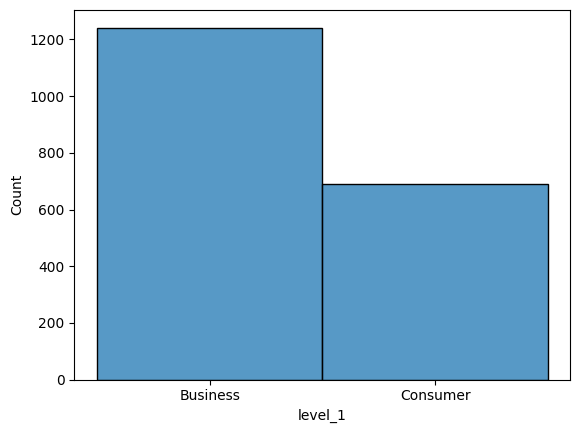

In [76]:
sns.histplot(x = "level_1", data = df)

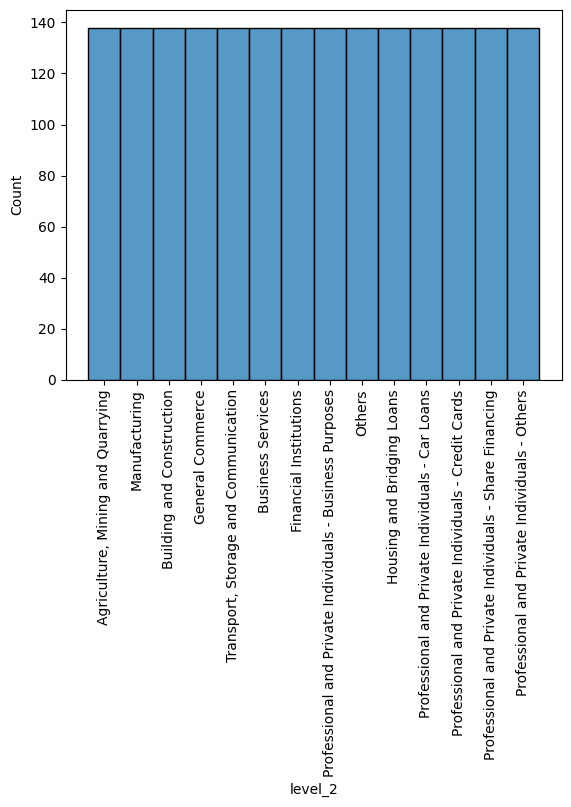

In [77]:
sns.histplot(x = 'level_2', data = df)
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Count of all the Loans to Business and Customer uses')

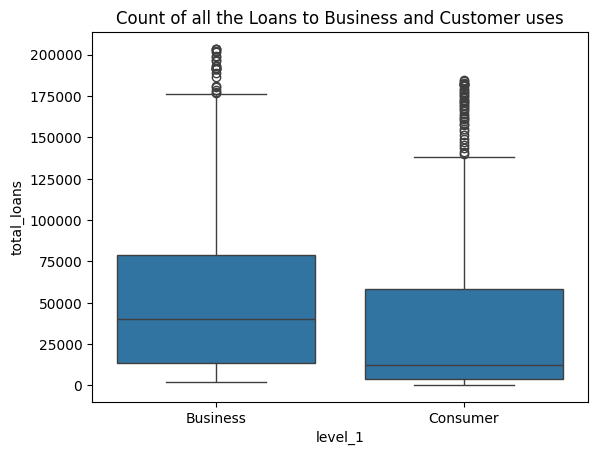

In [78]:
# Check if there are extreme values
sns.boxplot(x = 'level_1', y = "total_loans", data = df)
plt.title("Count of all the Loans to Business and Customer uses")

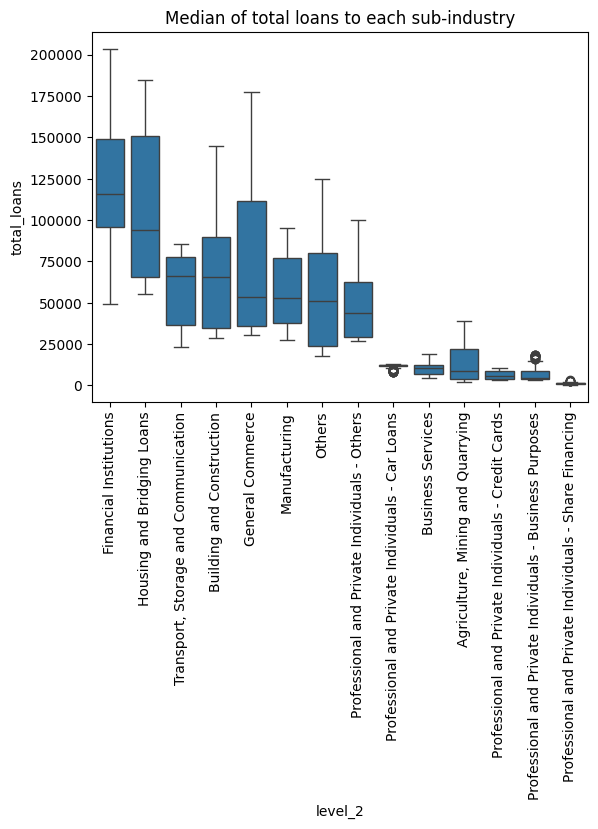

In [79]:
# Check if there are extreme values
medians = df.groupby("level_2")['total_loans'].median()
sorted_medians = medians.sort_values(ascending = False)
sorted_order = sorted_medians.index

# Plot the boxplot with the sorted order
sns.boxplot(x = 'level_2', y = "total_loans", data = df, order= sorted_order)
plt.title("Median of total loans to each sub-industry")
plt.xticks(rotation = 90)
plt.show()


We just plot out the purchases with the highest value, middle value, and the lowest value and see how they change over time.

In [85]:
#print(medians)
highest_df = df[df['level_2'] =="Financial Institutions"]
lowest_df = df[df['level_2'] == "Professional and Private Individuals - Share Financing"]
middle_df = df[df['level_2'] == "General Commerce"]


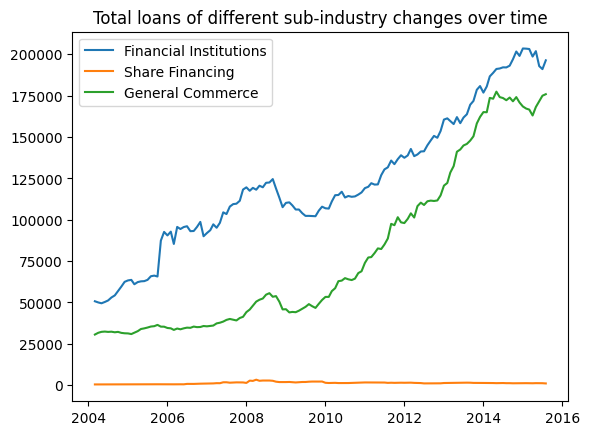

In [96]:
plt.plot(highest_df["datetime"], highest_df["total_loans"], label ="Financial Institutions")
plt.plot(lowest_df['datetime'], lowest_df['total_loans'], label = "Share Financing")
plt.plot(middle_df['datetime'], middle_df['total_loans'], label = "General Commerce")
plt.legend()
plt.title("Total loans of different sub-industry changes over time")
plt.show()